# Statistical tests
There are several hypothesis we need to test.

Settings and libraries loading:

In [60]:
Sys.setlocale(category = "LC_ALL", locale = "UTF-8")
path <- "~/Yandex.Disk.localized/Университет/Магистратура/2semester/R/Lecture-2/Datasets/"

required_packages <- c("ggplot2", "dplyr", "vcd")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

library(ggplot2)
library(dplyr)
library(vcd)

[1] "C/UTF-8/C/C/C/C"

## Babyboom

In [9]:
bb <- read.table(file = paste0(path, "babyboom.dat.txt"), header = F, col.names = c("time", "sex", "weight", "minutes"))
bb$sex <- as.factor(bb$sex)
male <- subset(bb, sex == "1")
female <- subset(bb, sex == "2")

**H0: Test a weight of babies for normality. First, for the whole dataset, then for group of boys and girls independently.**

For this test we will use Shapiro-Wilk test and draw qqplot.


	Shapiro-Wilk normality test

data:  bb$weight
W = 0.89872, p-value = 0.0009944



	Shapiro-Wilk normality test

data:  male$weight
W = 0.87028, p-value = 0.01798



	Shapiro-Wilk normality test

data:  female$weight
W = 0.94747, p-value = 0.2022


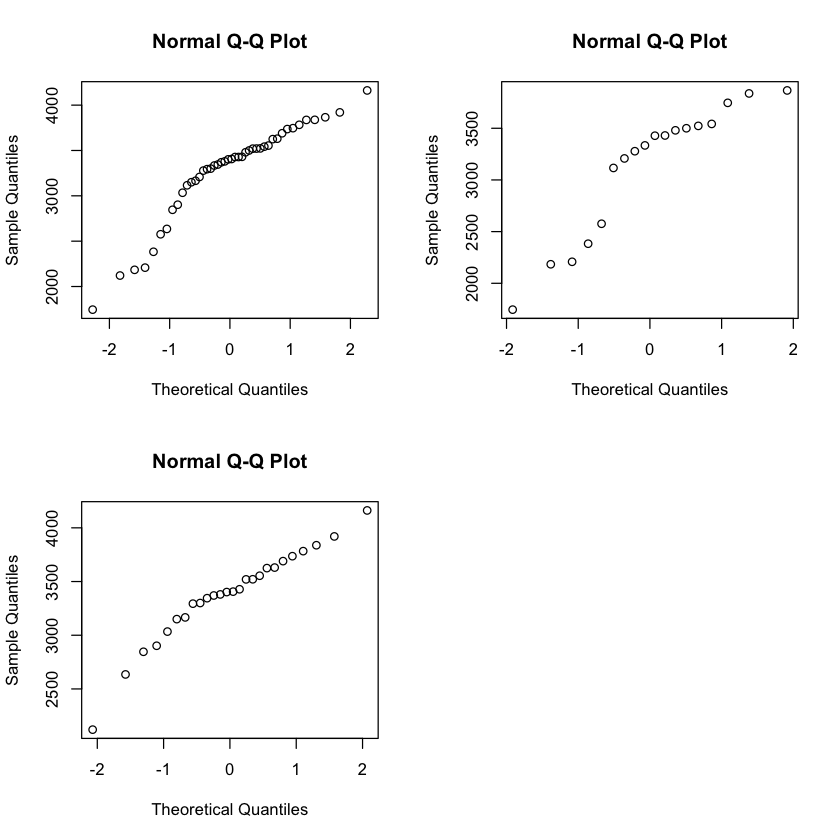

In [17]:
par(mfrow = c(2,2))
qqnorm(bb$weight)
qqnorm(male$weight)
qqnorm(female$weight)

shapiro.test(bb$weight)
shapiro.test(male$weight)
shapiro.test(female$weight)

For all babies: p-value = 0,00099 < 0,05, so it means that distribution is not normal.

For all male: p-value = 0,0179 < 0,05, so it means that distribution is not normal.

For all female: p-value = 0,202 > 0,05, so it means that distribution is normal.

**H0: Test the hypothesis if the mean of the weight of girls is the same as the weight of boys.**

We can't use t-test for comparing means because only one sample is normally distributed.

**H0: Test the hypothesis if the variance of the weight of girls is the same as the weight of boys.**

We can't checkout equity of variances because we failed with assumption of equity of means.

**H0: Test the hypothesis if the time between birthtime is distributed by exponential distribution.**

We will use Kolmogorov-Smirnov test according to exponential distribution for checking the distribution.

Warning message in ks.test(minutes_diff, "pexp"):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  minutes_diff
D = 0.86541, p-value < 2.2e-16
alternative hypothesis: two-sided


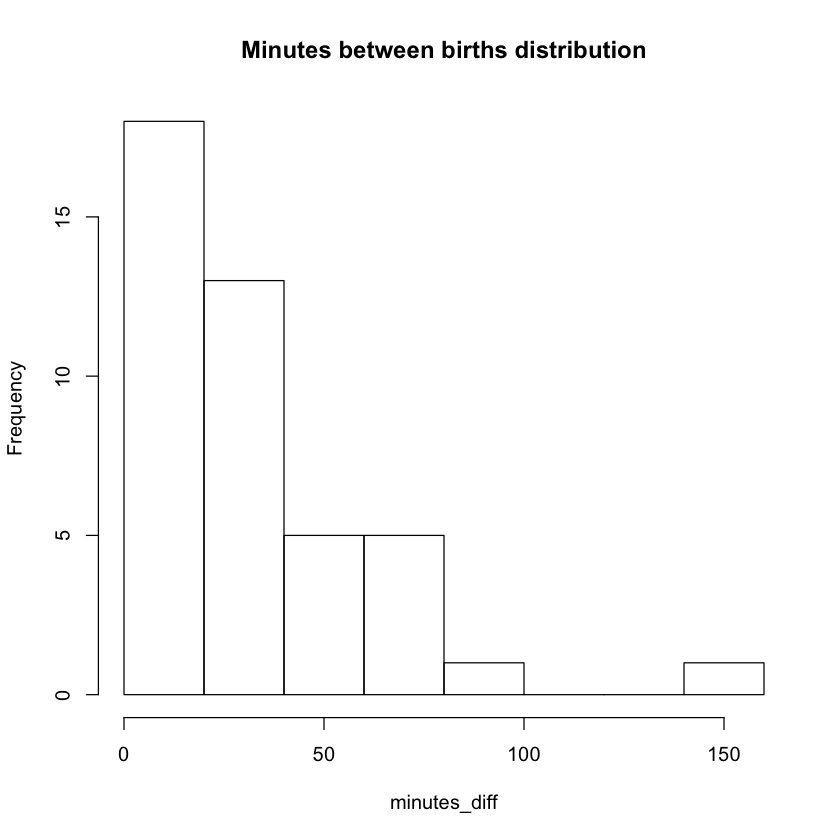

In [23]:
minutes_diff <- diff(bb$minutes)
hist(minutes_diff, main = "Minutes between births distribution")
ks.test(minutes_diff, "pexp")

P-value = 0 < 0,05, so it means that distribution is not exponential.

**H0: Test the hypothesis if the births per hour for each hour is distributed by Poisson distribution.**

We will use Kolmogorov-Smirnov test according to Poisson distribution for checking the distribution for $\lambda = 1.5$

Warning message in summary.goodfit(goodfit(groups$n, type = "poisson", "MinChisq")):
“Chi-squared approximation may be incorrect”


	 Goodness-of-fit test for poisson distribution

             X^2 df  P(> X^2)
Pearson 3.813132  3 0.2823623


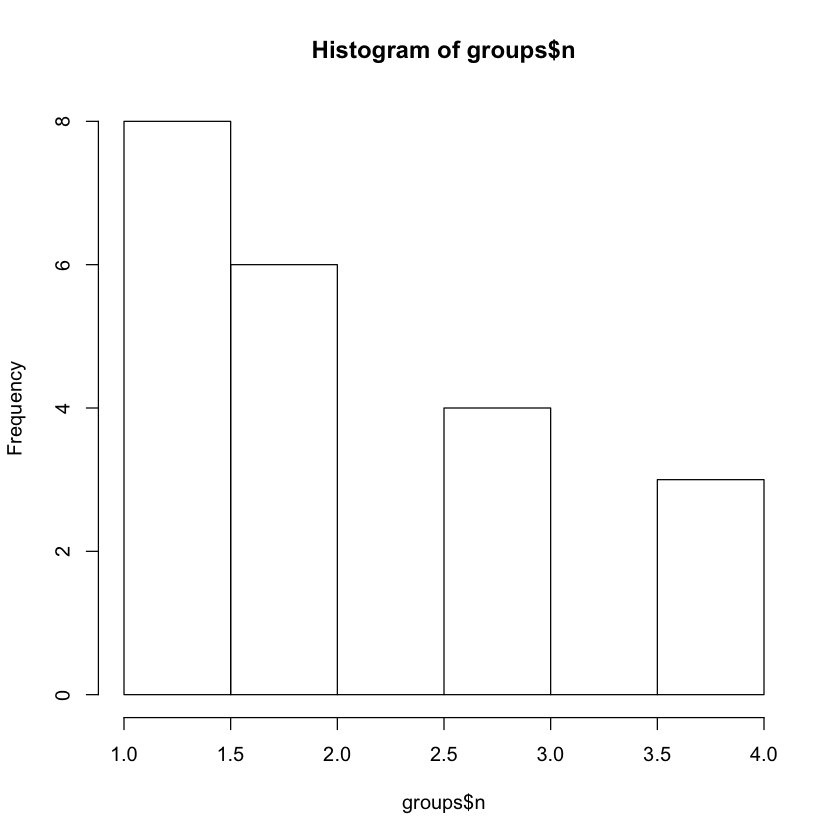

In [61]:
bb$group <- cut(bb$minutes, c(0, seq(60, 1440, by = 60)), include.lowest = T, right = T)
groups <- bb %>% group_by(group) %>% count()
groups$n <- as.numeric(groups$n)
hist(groups$n)
summary(goodfit(groups$n, type = "poisson", "MinChisq"))

P-value = 0.28 > 0,05, so it means that distribution is Poisson.

## Fisher's irises

In [31]:
iris <- read.table(file = paste0(path, "iris.txt"), header = F, col.names = c("sepal_l", "sepal_w", "petal_l", "petal_w", "type"), dec = ".", sep = ",")
setosa <- subset(iris, type == "Iris-setosa")
versi <- subset(iris, type == "Iris-versicolor")
virgin <- subset(iris, type == "Iris-virginica")

**H0: Test the normality of length of flowers grouping them by the type of iris.**

We will use Shapiro-Wilk test to test normality.


	Shapiro-Wilk normality test

data:  setosa$sepal_l
W = 0.9777, p-value = 0.4595



	Shapiro-Wilk normality test

data:  setosa$petal_l
W = 0.95495, p-value = 0.05465


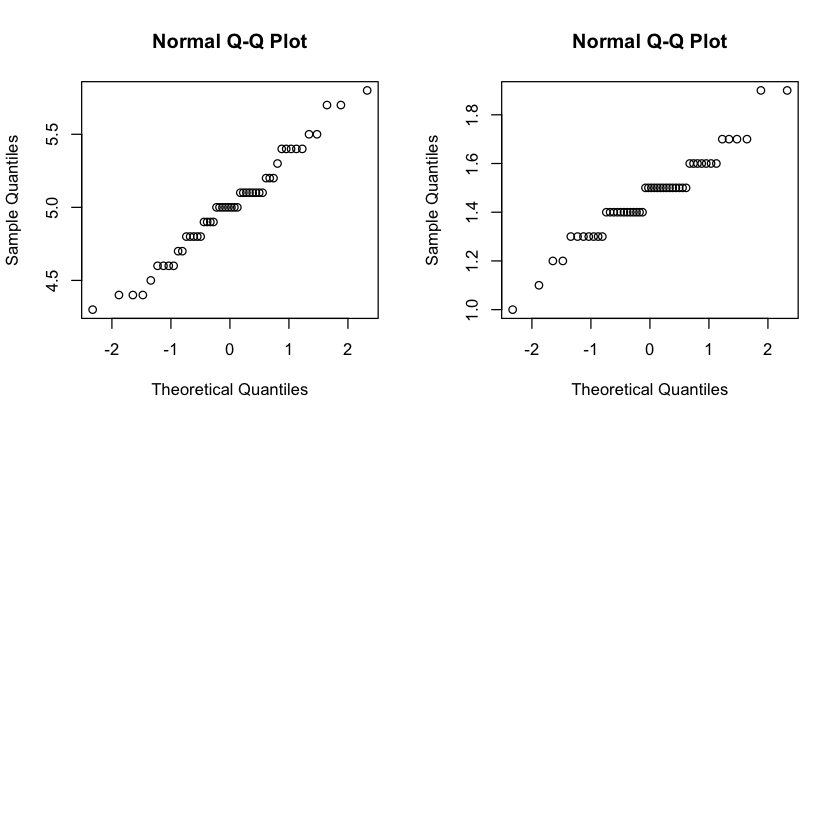

In [39]:
# Setosa
shapiro.test(setosa$sepal_l)
shapiro.test(setosa$petal_l)
par(mfrow = c(2,2))
qqnorm(setosa$sepal_l)
qqnorm(setosa$petal_l)


	Shapiro-Wilk normality test

data:  versi$sepal_l
W = 0.97784, p-value = 0.4647



	Shapiro-Wilk normality test

data:  versi$petal_l
W = 0.966, p-value = 0.1585


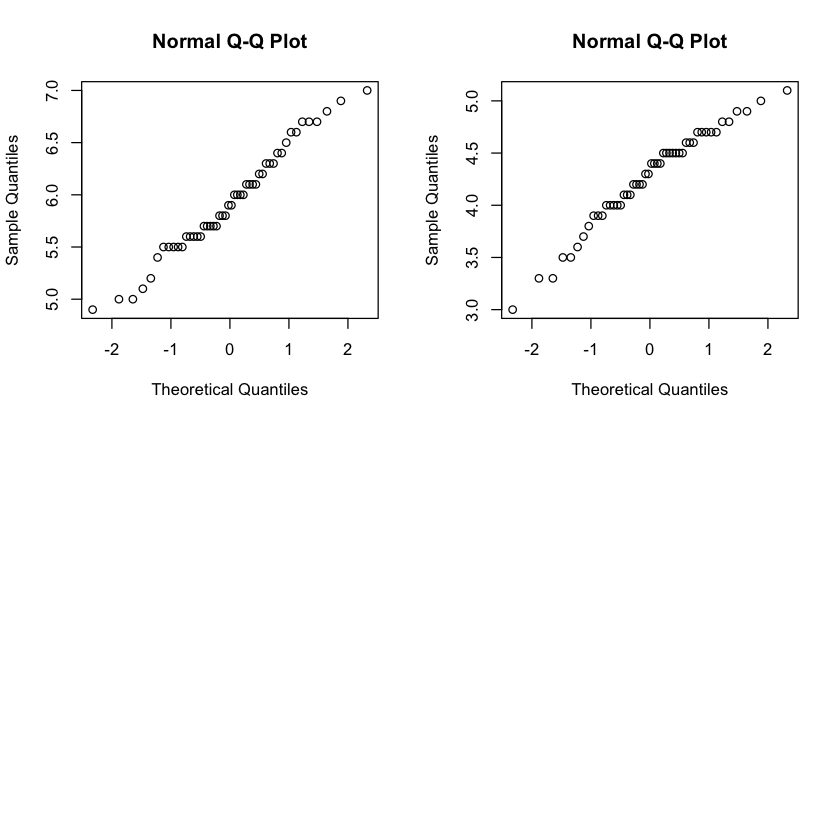

In [40]:
# Versicolor
shapiro.test(versi$sepal_l)
shapiro.test(versi$petal_l)
par(mfrow = c(2,2))
qqnorm(versi$sepal_l)
qqnorm(versi$petal_l)


	Shapiro-Wilk normality test

data:  virgin$sepal_l
W = 0.97118, p-value = 0.2583



	Shapiro-Wilk normality test

data:  virgin$petal_l
W = 0.96219, p-value = 0.1098


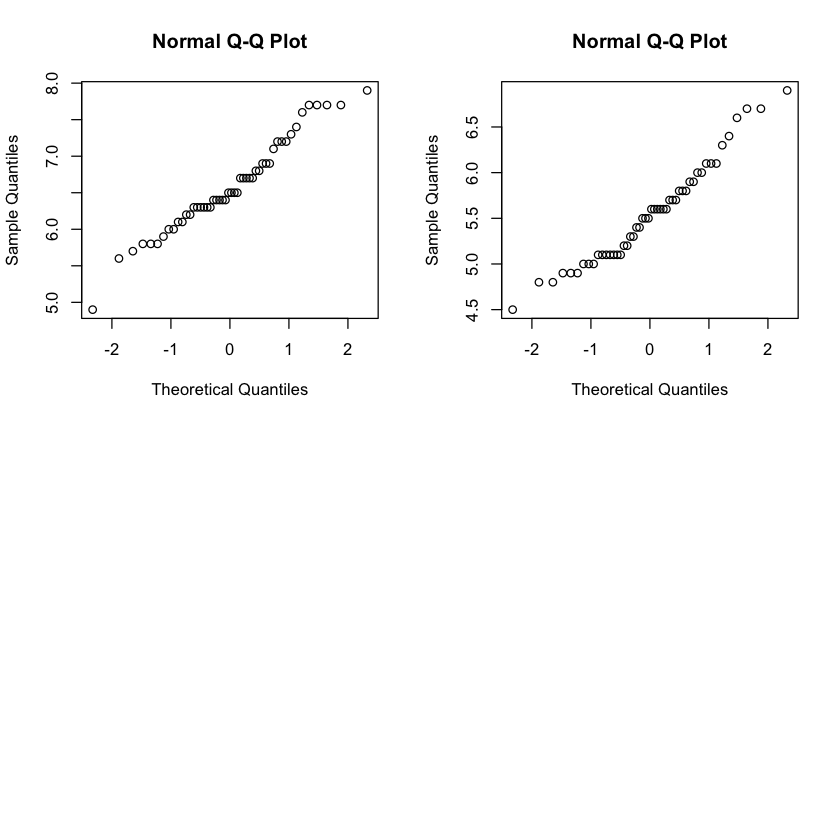

In [41]:
# Vigrinica
shapiro.test(virgin$sepal_l)
shapiro.test(virgin$petal_l)
par(mfrow = c(2,2))
qqnorm(virgin$sepal_l)
qqnorm(virgin$petal_l)

**H0: Test the hypotheses about similarity of distributions of characteristics of flowers of different types.**

We will use Kolmogorov-Smirnov test for two samples.

Warning message in ks.test(setosa$sepal_l, virgin$sepal_l):
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  setosa$sepal_l and virgin$sepal_l
D = 0.92, p-value < 2.2e-16
alternative hypothesis: two-sided


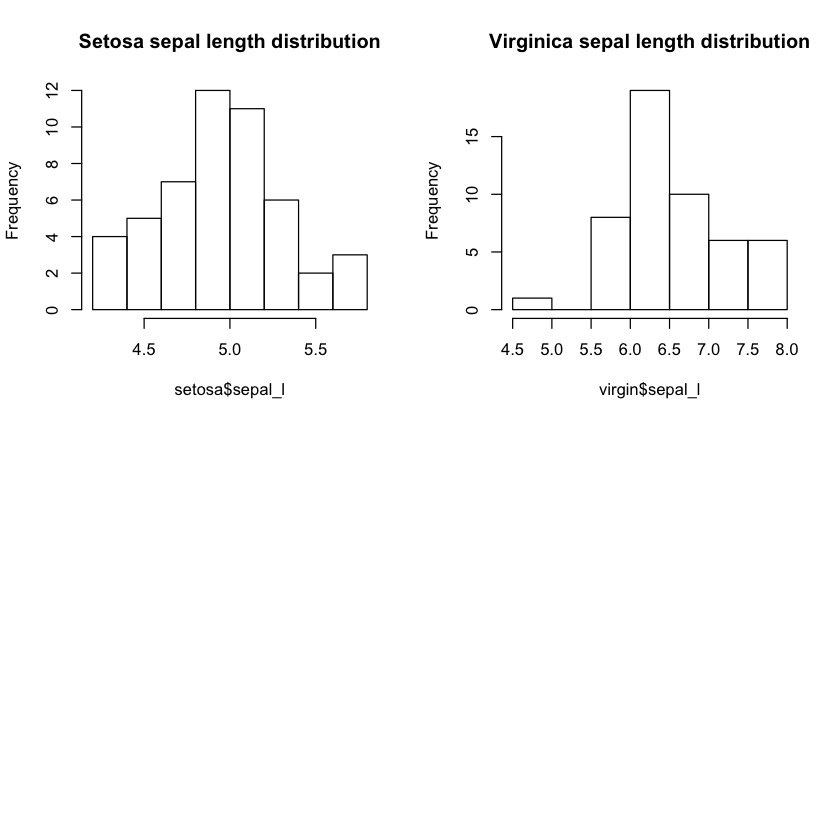

In [49]:
# Sepal length Setosa - Virginica
ks.test(setosa$sepal_l, virgin$sepal_l)

par(mfrow = c(2,2))
hist(setosa$sepal_l, main = "Setosa sepal length distribution")
hist(virgin$sepal_l, main = "Virginica sepal length distribution")

Warning message in ks.test(versi$petal_w, virgin$petal_w):
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  versi$petal_w and virgin$petal_w
D = 0.88, p-value < 2.2e-16
alternative hypothesis: two-sided


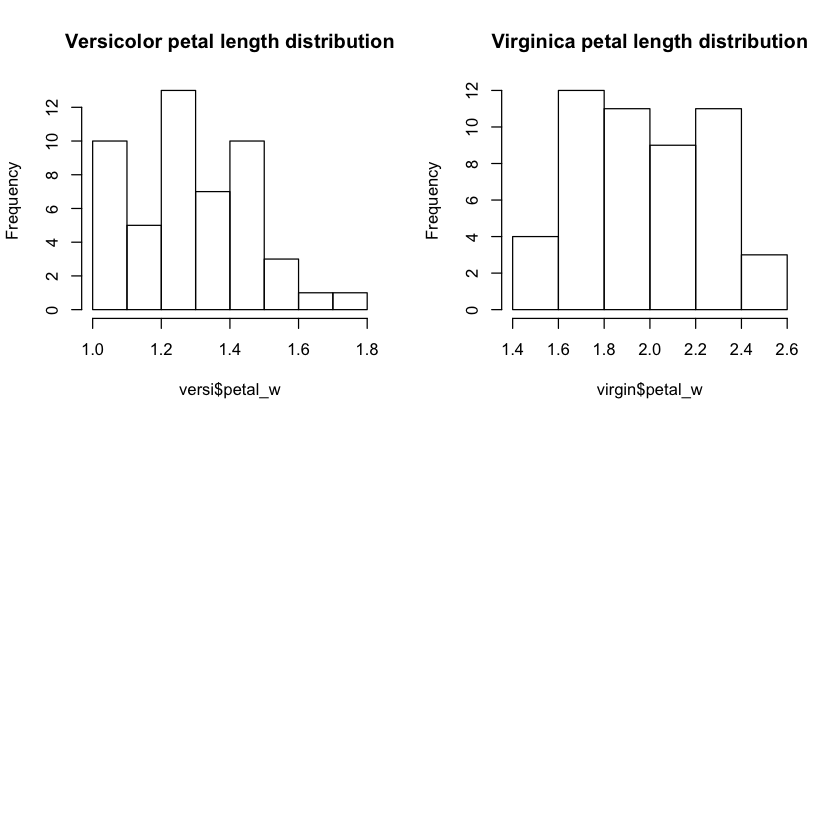

In [52]:
# Petal width Versicolor - Virginica
ks.test(versi$petal_w, virgin$petal_w)

par(mfrow = c(2,2))
hist(versi$petal_w, main = "Versicolor petal length distribution")
hist(virgin$petal_w, main = "Virginica petal length distribution")

Warning message in ks.test(setosa$petal_w, virgin$petal_w):
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  setosa$petal_w and virgin$petal_w
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


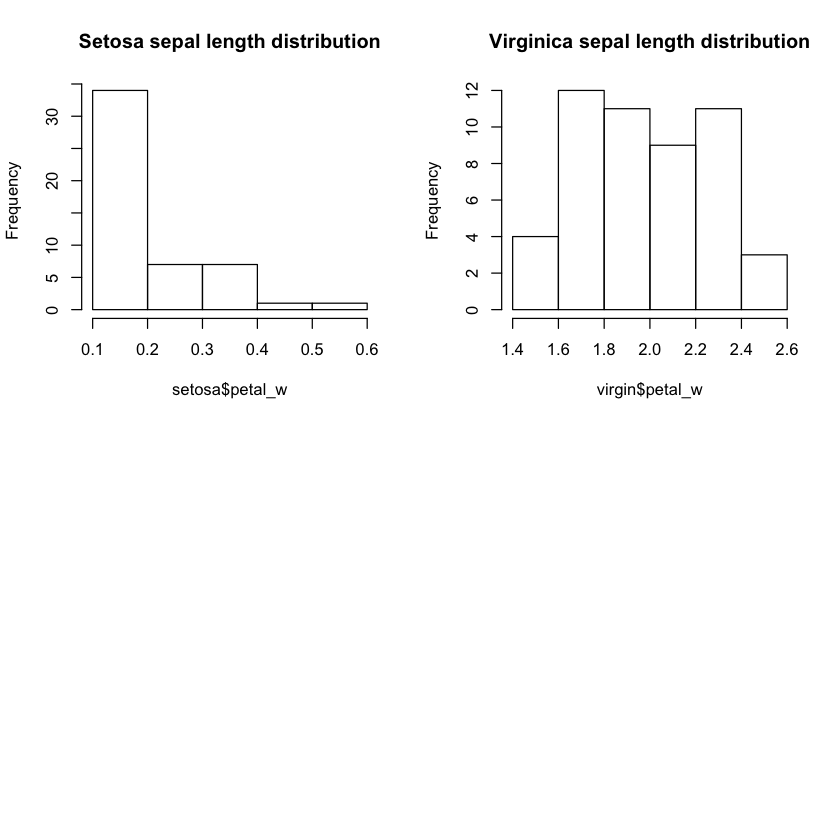

In [51]:
# Petal width Setosa - Virginica
ks.test(setosa$petal_w, virgin$petal_w)

par(mfrow = c(2,2))
hist(setosa$petal_w, main = "Setosa sepal length distribution")
hist(virgin$petal_w, main = "Virginica sepal length distribution")

Warning message in ks.test(versi$sepal_w, virgin$sepal_w):
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  versi$sepal_w and virgin$sepal_w
D = 0.26, p-value = 0.06809
alternative hypothesis: two-sided


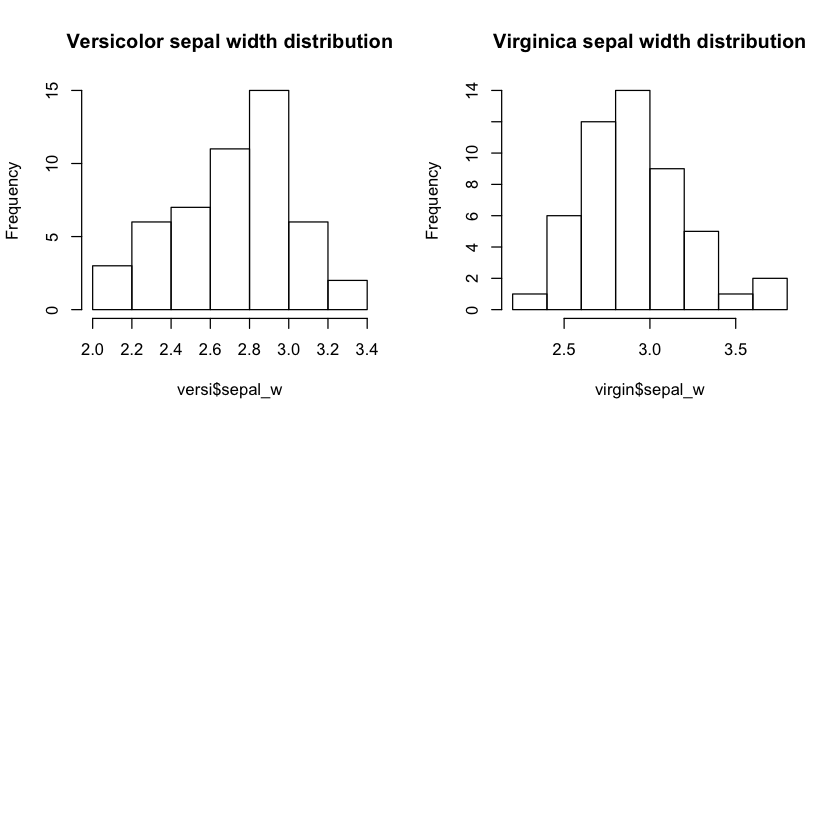

In [54]:
# Sepal width Versicolor - Virginica
ks.test(versi$sepal_w, virgin$sepal_w)

par(mfrow = c(2,2))
hist(versi$sepal_w, main = "Versicolor sepal width distribution")
hist(virgin$sepal_w, main = "Virginica sepal width distribution")

In the last example we see that distributions of sepal widths in Versicolor and Virginica types are similar, so we can check distributions with t-test.

In [55]:
t.test(versi$sepal_w, virgin$sepal_w)


	Welch Two Sample t-test

data:  versi$sepal_w and virgin$sepal_w
t = -3.2058, df = 97.927, p-value = 0.001819
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.33028364 -0.07771636
sample estimates:
mean of x mean of y 
    2.770     2.974 


P-value = 0,002 < 0,05, so it means that means of distributions are not equal.
We can't check variance differencies by F-test in this case.